In [1]:
from clustering_utils import *
from cdlib import algorithms
import networkx as nx

print("Available loaded variables: graph, simple_graph, communities")

#Tables: 11
MultiDiGraph Edges:  [('`advisor`', '`instructor`', {'relation': '`i_ID`->`ID`', 'weight': 1}), ('`advisor`', '`student`', {'relation': '`s_ID`->`ID`', 'weight': 1}), ('`course`', '`department`', {'relation': '`dept_name`->`dept_name`', 'weight': 1}), ('`instructor`', '`department`', {'relation': '`dept_name`->`dept_name`', 'weight': 1}), ('`prereq`', '`course`', {'relation': '`course_id`->`course_id`', 'weight': 1}), ('`prereq`', '`course`', {'relation': '`prereq_id`->`course_id`', 'weight': 1}), ('`section`', '`course`', {'relation': '`course_id`->`course_id`', 'weight': 1}), ('`section`', '`classroom`', {'relation': '`building`->`building`', 'weight': 1}), ('`section`', '`classroom`', {'relation': '`room_number`->`room_number`', 'weight': 1}), ('`section`', '`time_slot`', {'relation': '`time_slot_id`->`time_slot_id`', 'weight': 1}), ('`student`', '`department`', {'relation': '`dept_name`->`dept_name`', 'weight': 1}), ('`takes`', '`section`', {'relation': '`course_id`->`c

There are 3 communities
[{'`department`', '`advisor`', '`student`', '`instructor`'}, {'`course`', '`prereq`'}, {'`takes`', '`classroom`', '`teaches`', '`time_slot`', '`section`'}]


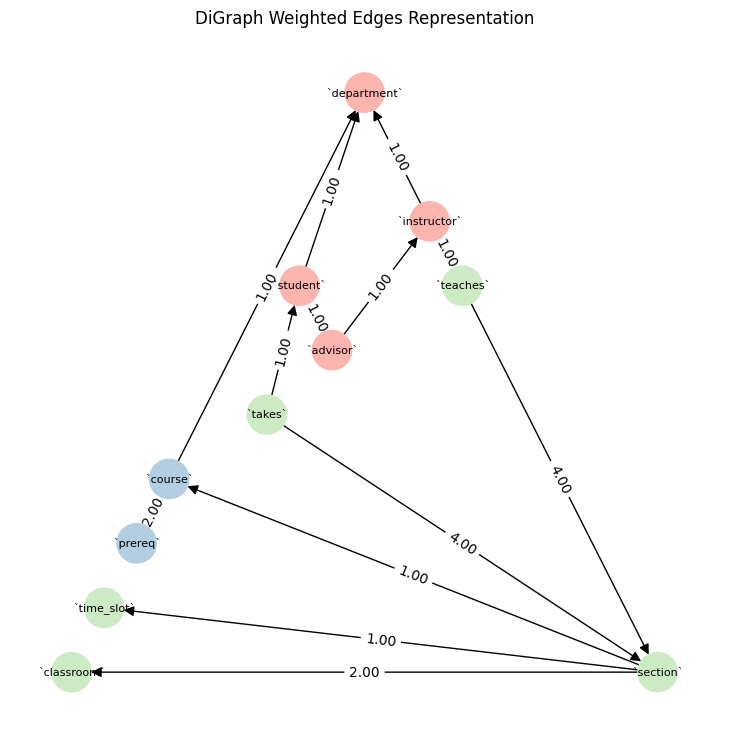

In [2]:
draw_colored_planar_graph(simple_graph, communities)


['`advisor`', '`classroom`', '`course`', '`department`', '`instructor`', '`prereq`', '`section`', '`student`', '`takes`', '`teaches`', '`time_slot`']
[['`advisor`', '`department`', '`instructor`', '`student`', '`takes`'], ['`classroom`', '`section`', '`teaches`', '`time_slot`'], ['`course`', '`prereq`']]
There are 3 communities
((0.984313725490196, 0.7058823529411765, 0.6823529411764706), (0.7019607843137254, 0.803921568627451, 0.8901960784313725), (0.8, 0.9215686274509803, 0.7725490196078432))


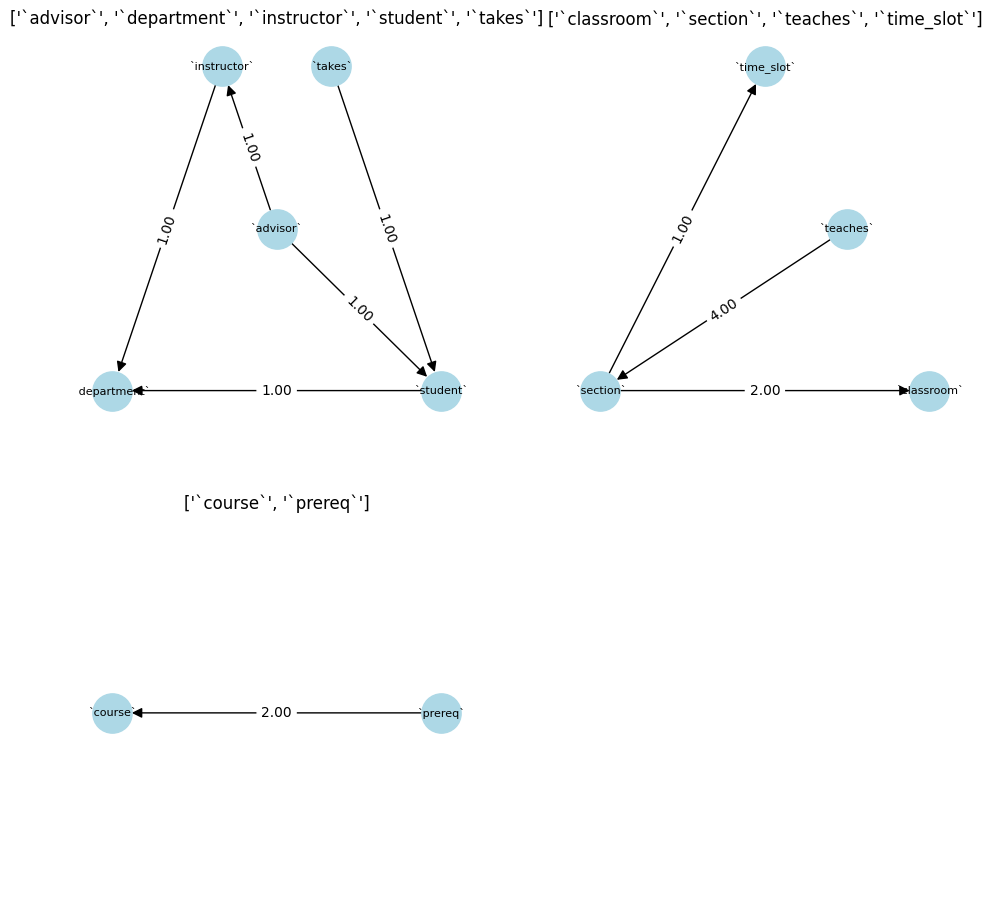

In [3]:
print(simple_graph.to_undirected().nodes())
# coms = algorithms.conga(simple_graph.to_undirected(), number_communities=3)
coms = algorithms.congo(simple_graph.to_undirected(), number_communities=3)
print(coms.communities)
draw_communities(simple_graph, coms.communities)


In [4]:
K_graph = nx.convert_node_labels_to_integers(simple_graph.to_undirected())
c = list(nx.community.k_clique_communities(K_graph.to_undirected(), 3))
print(list(c))

[]


In [8]:
part = nx.community.edge_current_flow_betweenness_partition(simple_graph.to_undirected(), 3)
print(part)

[{'`department`', '`advisor`', '`teaches`', '`student`', '`instructor`'}, {'`course`', '`prereq`'}, {'`section`', '`time_slot`', '`takes`', '`classroom`'}]


In [12]:
list(nx.community.label_propagation_communities(simple_graph.to_undirected()))

[{'`advisor`', '`department`', '`instructor`', '`student`'},
 {'`classroom`', '`section`', '`takes`', '`teaches`', '`time_slot`'},
 {'`course`', '`prereq`'}]